# Clustering

In the US, the Senate votes on proposed legislation. Getting a bill passed by the Senate is a key step towards getting its provisions enacted. A majority vote is required to get a bill passed.

The results of these votes, known as roll call votes, are public, and available in a few places, including here. Read more about the US legislative system here.

Senators typically vote in accordance with how their political party votes, known as voting along party lines. In the US, the 2 main political parties are the Democrats, who tend to be liberal, and the Republicans, who tend to be conservative. Senators can also choose to be unaffiliated with a party, and vote as Independents, although very few choose to do so.

114_congress.csv contains all of the results of roll call votes from the 114th Senate. Each row represents a single Senator, and each column represents a vote. A 0 in a cell means the Senator voted No on the bill, 1 means the Senator voted Yes, and 0.5 means the Senator abstained.

Here are the relevant columns:

name -- The last name of the Senator.
party -- the party of the Senator. The valid values are D for Democrat, R for Republican, and I for Independent.
Several columns numbered like 00001, 00004, etc. Each of these columns represents the results of a single roll call vote.
Below are the first three rows of the data. As you can see, the number of each bill is used as the column heading for its votes:


name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
Alexander,R,TN,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0
Ayotte,R,NH,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0
Clustering voting data of Senators is particularly interesting because it can expose patterns that go deeper than party affiliation. For example, some Republicans are more liberal than the rest of their party. Looking at voting data can help us discover the Senators who are more or less in the mainstream of their party.

In [2]:
import pandas as pd

In [3]:
#Doing some initial exloration
votes = pd.read_csv("114_congress.csv")

In [4]:
print(votes["party"].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [5]:
from sklearn.metrics.pairwise import euclidean_distancesclidean_distances

In [9]:
#computing the distance between first row and third row
distance = euclidean_distances(votes.iloc[0,3:].reshape(1,-1),votes.iloc[2,3:].reshape(1,-1))
print(distance)

[[ 3.31662479]]


C:\Users\Vedha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans_model = KMeans(n_clusters=2,random_state=1)

In [16]:
?KMeans.fit_transform()

In [28]:
senator_distances=kmeans_model.fit_transform(votes.iloc[:,3:])
print(senator_distances)

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 1.43833966  2.96866004]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 0.31287498  3.30758755]
 [ 0.33960656  3.41651746]
 [ 3.27058526  0.96734144]
 [ 0.33960656  3.41651746]
 [ 3.34875646  0.53945585]
 [ 0.33960656  3.41651746]
 [ 1.18084816  3.12695614]
 [ 1.23852221  3.13536063]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 2.6146248   2.05339992]
 [ 0.58487332  3.31421108]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 3.56324683  0.93036231]
 [ 3.42004795  0.24198446]
 [ 1.73847904  2.82326711]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.33960656  3.41651746]
 [ 3.42004795  0.24198446]
 [ 3.42004795  0.24198446]
 [ 0.58487332  3.31421108]
 [ 3.27058526  0.92088553]
 

In [23]:
labels=kmeans_model.labels_
print(labels)

[1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0]


Use the Pandas method crosstab() to compute and display how many Senators from each party ended up in each cluster. The crosstab() method takes in two vectors or Pandas Series and computes how many times each unique value in the second vector occurs for each unique value in the first vector.

In [24]:
pd.crosstab(labels,votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


It looks like both of our clusters mostly broke down along party lines. The first cluster contains 41 Democrats, and both Independents. The second cluster contains 3 Democrats, and 54 Republicans.

No Republicans seem to have broken party ranks to vote with the Democrats, but 3 Democrats are more similar to Republicans in their voting than their own party. Let's explore these 3 in more depth so we can figure out why that is.

We can do this by subsetting votes to only select rows where the party column is D, and the labels variable is 1, indicating that the Senator is in the second cluster.

We can perform this subsetting with Pandas. The below code will select all Independents in the first cluster:


votes[(labels == 0) & (votes["party"] == "I")]
When subsetting a DataFrame with multiple conditions, each condition needs to be in parentheses, and separated by &.

In [26]:
#Select all senators who were assigned to the second cluster that were Democrats
democratic_outliers=votes[(labels==1)&(votes['party']=='D')]
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


One great way to explore clusters is to visualize them using matplotlib. Earlier, we computed a senator_distances array that shows the distance from each Senator to the center of each cluster. We can treat these distances as x and y coordinates, and make a scatterplot that shows the position of each Senator. This works because the distances are relative to the cluster centers.

While making the scatterplot, we can also shade each point according to party affiliation. This will enable us to quickly look at the layout of the Senators, and see who crosses party lines.

In [30]:
import matplotlib.pyplot as plt 

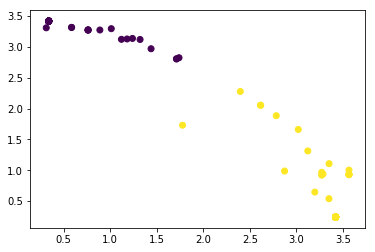

In [35]:
plt.scatter(senator_distances[:,0],senator_distances[:,1],c=labels)
plt.show()

In [39]:
import numpy as np
extremism = np.sum(senator_distances**3,axis=1)
votes['extremism'] = extremism

In [41]:
votes.sort_values('extremism',inplace=True,ascending=False)

In [42]:
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476